In [1]:
import time
import h5py
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
from PIL import Image
from dnn_functions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0,4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

### Loading the Data 

In [2]:
train = h5py.File('datasets/train_catvnoncat.h5', 'r')
test = h5py.File('datasets/test_catvnoncat.h5', 'r')

train_x_orig = np.array(train["train_set_x"][:])
test_x_orig  = np.array(test["test_set_x"][:])
train_y = np.array(train["train_set_y"][:])
test_y  = np.array(test["test_set_y"][:])
classes = np.array(train["list_classes"][:])

print("train_x_orig_shape: {}".format(train_x_orig.shape))
print("test_x_orig_shape : {}".format(test_x_orig.shape))
print("train_y_shape     : {}".format(train_y.shape))
print("test_y_shape      : {}".format(test_y.shape))
print("Classes           : {}".format(classes.tolist()))
print("Image Size        : {}".format(train_x_orig.shape[1:4]))

train_x_orig_shape: (209, 64, 64, 3)
test_x_orig_shape : (50, 64, 64, 3)
train_y_shape     : (209,)
test_y_shape      : (50,)
Classes           : [b'non-cat', b'cat']
Image Size        : (64, 64, 3)


It is a cat picture


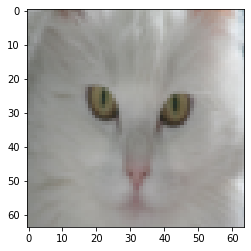

In [3]:
index = 50
plt.imshow(train_x_orig[index])
print("It is a {} picture".format(classes[train_y[index]].decode('utf-8')))

### Data Preprocessing 

In [4]:
# Reshapiing the data
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0],-1).T
test_x_flatten  = test_x_orig.reshape(test_x_orig.shape[0],-1).T
train_y = train_y.reshape(1,train_y.shape[0])
test_y  = test_y.reshape(1,test_y.shape[0])

# Scaling the data
# As the input is image, the maximum valie in the dataset will be 255
train_x = train_x_flatten/255
test_x  = test_x_flatten/255

print("train_x_shape: {}".format(train_x.shape))
print("test_x_shape : {}".format(test_x.shape))
print("train_y_shape: {}".format(train_y.shape))
print("test_y_shape : {}".format(test_y.shape))

train_x_shape: (12288, 209)
test_x_shape : (12288, 50)
train_y_shape: (1, 209)
test_y_shape : (1, 50)


### Training and Testing the Model 

In [5]:
def L_layer_model(X,Y,layers_dims,learning_rate=0.0075,num_iterations=3000,print_cost=False):
    
    costs = []
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0,num_iterations):
        
        AL, caches = L_model_forward(X,parameters)
        cost       = compute_cost(AL,Y)  
        grads      = L_model_backward(AL,Y,caches)
        parameters = update_parameters(parameters, grads, learning_rate)
            
        if print_cost and (i % 200 == 0 or i == num_iterations - 1):
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
        
    return parameters, costs

In [6]:
layers_dims = [12288, 20, 7, 5, 1]
learning_rates = [0.1,0.01,0.001,0.001]

In [ ]:
train_accuracies = []
test_accuracies = []
plt.figure(figsize=(15,14))

for i,lr in enumerate(learning_rates):
    parameters, costs = L_layer_model(train_x, train_y, layers_dims, lr, num_iterations=2500, print_cost=False)
    
    train_accuracy = accuracy(train_x,train_y,parameters)
    test_accuracy  = accuracy(test_x,test_y,parameters)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    print("Train accuracy for learning rate {}: {}".format(lr,train_accuracy))
    print("Test accuracy for learning rate {}: {}\n".format(lr,test_accuracy))
    
    plt.subplot(3,2,i+1)
    plt.plot(costs,color="r")
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.title("Learning rate = {}".format(str(lr)))
    plt.ylabel("cost")

plt.show()

In [ ]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.plot(learning_rates, train_accuracies,color="r")
plt.title("Train Accuracy Vs. Learning Rate")
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")

plt.subplot(1,2,2)
plt.plot(learning_rates, test_accuracies, color="r")
plt.title("Test Accuracy Vs. Learning Rate")
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")

plt.show()

In [7]:
# The model performance is better with learning_rate=0.01

learning_rate = 0.01

parameters, costs = L_layer_model(train_x, train_y, layers_dims, learning_rate, num_iterations=2500, print_cost=True)
prediction = predict(test_x,parameters)

Cost after iteration 0: 0.7717493284237686
Cost after iteration 200: 0.6388738671173996
Cost after iteration 400: 0.5688271812027765
Cost after iteration 600: 0.5084836067888392
Cost after iteration 800: 0.3103980005754491
Cost after iteration 1000: 0.20730930330849948
Cost after iteration 1200: 0.11567032435733034
Cost after iteration 1400: 0.08584462857591119
Cost after iteration 1600: 0.067808819508068
Cost after iteration 1800: 0.05205409767343472
Cost after iteration 2000: 0.042258944535071216
Cost after iteration 2200: 0.03473029997869357
Cost after iteration 2400: 0.028787574070262143
Cost after iteration 2499: 0.02666281261085066


### Prediction 

(12288, 1)
[[1.]]
[[1.]]
This is a cat image


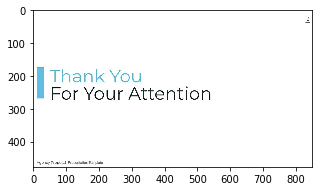

In [16]:
plt.figure(figsize=(5,5))

img = Image.open('1.jpg')
plt.imshow(img)

img = np.array(img.resize((64,64))).reshape(1,-1).T
print(img.shape)
probs,class_prediction = predict(img,parameters)
print(probs)
print(class_prediction)

print("This is a {} image".format(classes[int(np.squeeze(class_prediction))].decode('utf-8')))


### Result Analysis

In [ ]:
print_mislabelled_images(classes,test_x,test_y,prediction)

**A few types of images the model tends to do poorly on include:** 
- Cat body in an unusual position
- Cat appears against a background of a similar color
- Unusual cat color and species
- Camera Angle
- Brightness of the picture
- Scale variation (cat is very large or small in image) 

### Exporting Parameters

In [ ]:
parameters

In [ ]:
import pickle

pickle.dump(parameters, open("parameters.pkl", "wb"))